<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(0)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0'

In [4]:
os.listdir(base_path)

['data_add_delta_0_n20.csv',
 'data_add_delta_0_n30.csv',
 'data_add_delta_0_n60.csv',
 'data_add_delta_0_n120.csv',
 'data_add_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.022248,42.417986,-0.962891,95.477342,96.522200,-1.044857
1,0.0,1.0,50.147688,22.278099,1.454951,83.880738,82.467502,1.413236
2,0.0,2.0,86.096141,28.354175,-1.105300,123.345016,124.430751,-1.085734
3,0.0,3.0,80.374853,86.667637,2.171829,179.214318,177.116129,2.098190
4,0.0,4.0,78.796119,48.157402,0.738119,137.691640,136.976014,0.715626
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,52.162107,71.917598,-2.021673,132.058032,133.881545,-1.823513
119996,999.0,116.0,88.937262,43.645309,-1.907674,140.674897,142.529760,-1.854863
119997,999.0,117.0,30.533728,25.112406,-1.357146,64.288988,65.776142,-1.487154
119998,999.0,118.0,97.467198,43.389183,-0.591346,150.265035,150.796190,-0.531155


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.022248,42.417986,-0.962891,95.477342,96.522200,-1.044857
1,0.0,1.0,50.147688,22.278099,1.454951,83.880738,82.467502,1.413236
2,0.0,2.0,86.096141,28.354175,-1.105300,123.345016,124.430751,-1.085734
3,0.0,3.0,80.374853,86.667637,2.171829,179.214318,177.116129,2.098190
4,0.0,4.0,78.796119,48.157402,0.738119,137.691640,136.976014,0.715626
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,52.162107,71.917598,-2.021673,132.058032,133.881545,-1.823513
119996,999.0,116.0,88.937262,43.645309,-1.907674,140.674897,142.529760,-1.854863
119997,999.0,117.0,30.533728,25.112406,-1.357146,64.288988,65.776142,-1.487154
119998,999.0,118.0,97.467198,43.389183,-0.591346,150.265035,150.796190,-0.531155


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    44.022248  42.417986 -0.962891   95.477342   96.522200 -1.044857
      1.0    50.147688  22.278099  1.454951   83.880738   82.467502  1.413236
      2.0    86.096141  28.354175 -1.105300  123.345016  124.430751 -1.085734
      3.0    80.374853  86.667637  2.171829  179.214318  177.116129  2.098190
      4.0    78.796119  48.157402  0.738119  137.691640  136.976014  0.715626
...                ...        ...       ...         ...         ...       ...
999.0 115.0  52.162107  71.917598 -2.021673  132.058032  133.881545 -1.823513
      116.0  88.937262  43.645309 -1.907674  140.674897  142.529760 -1.854863
      117.0  30.533728  25.112406 -1.357146   64.288988   65.776142 -1.487154
      118.0  97.467198  43.389183 -0.591346  150.265035  150.796190 -0.531155
      119.0  78.580307  84.102410 -0.227361  172.455355  172.377069  0.078287

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    44.022248  42.417986 -0.962891   95.477342   96.522200 -1.044857
      1.0    50.147688  22.278099  1.454951   83.880738   82.467502  1.413236
      2.0    86.096141  28.354175 -1.105300  123.345016  124.430751 -1.085734
      3.0    80.374853  86.667637  2.171829  179.214318  177.116129  2.098190
      4.0    78.796119  48.157402  0.738119  137.691640  136.976014  0.715626
...                ...        ...       ...         ...         ...       ...
999.0 115.0  52.162107  71.917598 -2.021673  132.058032  133.881545 -1.823513
      116.0  88.937262  43.645309 -1.907674  140.674897  142.529760 -1.854863
      117.0  30.533728  25.112406 -1.357146   64.288988   65.776142 -1.487154
      118.0  97.467198  43.389183 -0.591346  150.265035  150.796190 -0.531155
      119.0  78.580307  84.102410 -0.227361  172.455355  172.377069  0.078287

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.022248,42.417986,-0.962891,95.477342,96.522200,-1.044857
1,0.0,1.0,50.147688,22.278099,1.454951,83.880738,82.467502,1.413236
2,0.0,2.0,86.096141,28.354175,-1.105300,123.345016,124.430751,-1.085734
3,0.0,3.0,80.374853,86.667637,2.171829,179.214318,177.116129,2.098190
4,0.0,4.0,78.796119,48.157402,0.738119,137.691640,136.976014,0.715626
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,52.162107,71.917598,-2.021673,132.058032,133.881545,-1.823513
119996,999.0,116.0,88.937262,43.645309,-1.907674,140.674897,142.529760,-1.854863
119997,999.0,117.0,30.533728,25.112406,-1.357146,64.288988,65.776142,-1.487154
119998,999.0,118.0,97.467198,43.389183,-0.591346,150.265035,150.796190,-0.531155


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    44.022248  42.417986 -0.962891   95.477342   96.522200 -1.044857
      1.0    50.147688  22.278099  1.454951   83.880738   82.467502  1.413236
      2.0    86.096141  28.354175 -1.105300  123.345016  124.430751 -1.085734
      3.0    80.374853  86.667637  2.171829  179.214318  177.116129  2.098190
      4.0    78.796119  48.157402  0.738119  137.691640  136.976014  0.715626
...                ...        ...       ...         ...         ...       ...
999.0 115.0  52.162107  71.917598 -2.021673  132.058032  133.881545 -1.823513
      116.0  88.937262  43.645309 -1.907674  140.674897  142.529760 -1.854863
      117.0  30.533728  25.112406 -1.357146   64.288988   65.776142 -1.487154
      118.0  97.467198  43.389183 -0.591346  150.265035  150.796190 -0.531155
      119.0  78.580307  84.102410 -0.227361  172.455355  172.377069  0.078287

[120000 rows x 6 columns]

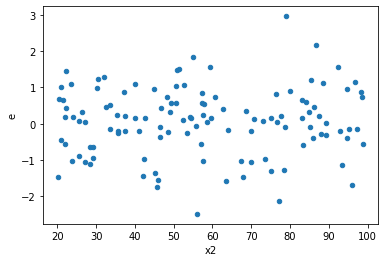

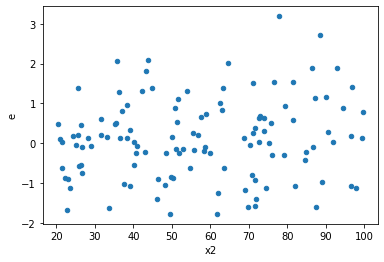

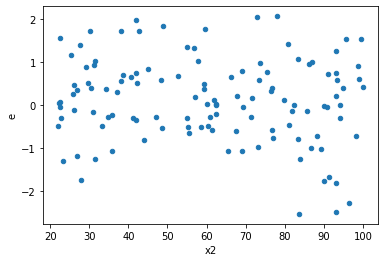

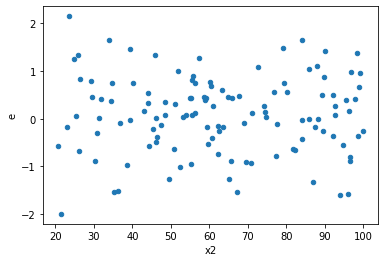

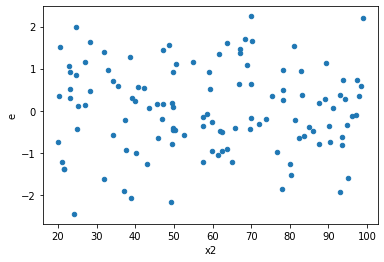

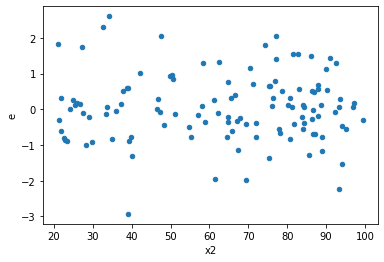

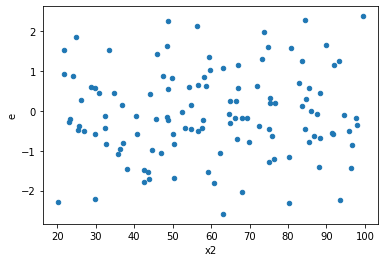

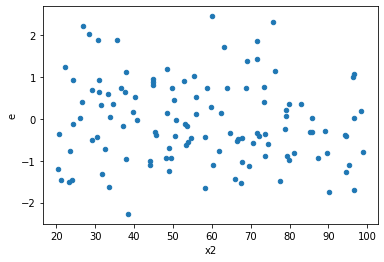

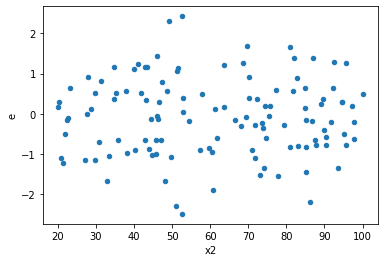

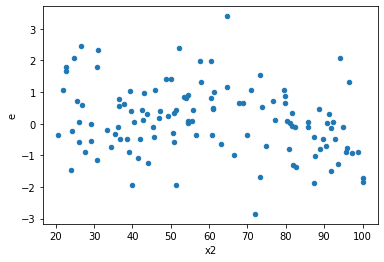

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,32.77804352535877,43.92458079726502,0.7125661635947559,0.9548821912448918,1.340061091909977,0.3243679500938812,0.8378160249530594,0.1621839750469406,Reject001=1 : Homoscedasticity
1.0,46.0,46.0,29.966164984459347,50.98270334821524,0.6514383692273771,1.1083196380046791,1.70134227635252,0.07474374159275676,0.9626281292036216,0.03737187079637838,Reject001=1 : Homoscedasticity
2.0,46.0,46.0,35.830072168467474,49.8670066051364,0.7789146123579885,1.084065360981226,1.391764057037603,0.26594907756744735,0.8670254612162763,0.13297453878372367,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,37.92399277441115,43.90002005384284,0.8244346255306771,0.9543482620400617,1.157579063865447,0.6217837865352824,0.6891081067323588,0.3108918932676412,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,44.034521623417376,46.42857255385007,0.9572722092047256,1.0093167946489146,1.0543675925653646,0.8582919937047042,0.5708540031476479,0.4291459968523521,Reject001=1 : Homoscedasticity
11.0,46.0,46.0,33.464037188522155,40.555074664446096,0.7274790693156991,0.8816320579227412,1.2119002389333975,0.5171665242989056,0.7414167378505472,0.2585832621494528,Reject001=1 : Homoscedasticity
15.0,46.0,46.0,36.90855566043036,44.081053689687316,0.8023599056615296,0.9582837758627677,1.1943315824993548,0.5494588420803033,0.7252705789598484,0.27472942104015163,Reject001=1 : Homoscedasticity
16.0,46.0,46.0,35.21182926397367,40.19068215431125,0.7654745492168189,0.8737104816154619,1.1413971666456875,0.6556695349787689,0.6721652325106156,0.32783476748938445,Reject001=1 : Homoscedasticity
18.0,46.0,46.0,33.043560515526536,41.01499915004119,0.7183382720766638,0.8916304163052433,1.2412403055284866,0.46649536176751516,0.7667523191162424,0.23324768088375758,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,32.77804352535877,43.92458079726502,0.7125661635947559,0.9548821912448918,1.340061091909977,0.3243679500938812,Reject001=1 : Homoscedasticity
1.0,46.0,46.0,29.966164984459347,50.98270334821524,0.6514383692273771,1.1083196380046791,1.70134227635252,0.07474374159275676,Reject001=1 : Homoscedasticity
2.0,46.0,46.0,35.830072168467474,49.8670066051364,0.7789146123579885,1.084065360981226,1.391764057037603,0.26594907756744735,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,36.33159827629572,22.98182888141811,0.7898173538325157,0.4996049756830024,0.632557607475596,0.12403706689997397,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,57.418101439402506,44.00744913572875,1.2482195965087501,0.9566836768636684,0.7664385974547243,0.37033105109261777,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,37.92399277441115,43.90002005384284,0.8244346255306771,0.9543482620400617,1.157579063865447,0.6217837865352824,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,58.35614792237465,54.95899333646071,1.2686119113559706,1.1947607247056675,0.9417858322240042,0.839701102202109,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,44.034521623417376,46.42857255385007,0.9572722092047256,1.0093167946489146,1.0543675925653646,0.8582919937047042,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,52.57106255575201,35.51294557677223,1.1428491859946088,0.7720205560167877,0.675522689675722,0.1872172600040343,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      993
Reject001=0 : Heteroscedasticity      7
Name: Result_test, dtype: int64